# Manual Preprocessing PLUS Preliminary Analysis with Maxfiltered Data

##### Last edited AXL 16/10/23

This jupyter notebook contains manual preprocessing and some preliminary 'analyses'/visualisation of the COINS-MEG MEG data. The inputted data is the maxfiltered version. 

## Load packages and data

In [2]:
# Load packages

from matplotlib import pyplot as plt

import mne
import osl
import numpy as np
import os

from pprint import pprint
import glob
import pandas as pd
from mne.preprocessing import create_eog_epochs, create_ecg_epochs

In [3]:
# Read in the data ####
basedir = '/Users/amyli/Desktop/LH-lab/coins-meg_meg-analysis/'
#basedir = '/ohba/pi/lhunt/datasets/coins-meg_meg-analysis'
subj = 12
run = 2
ifMaxfiltered = True # set to true so that directories point to maxfiltered data

In [4]:
outdir = os.path.join(basedir, 'preprocessed', f'sub-{subj}', f'run-{run}')


if ifMaxfiltered == False:
    outdir_meg = os.path.join(outdir, 'meg', 'nomax')  # for any meg-related outputs
else:
    outdir_meg = os.path.join(outdir, 'meg', 'max') # for any meg-related outputs

outdir_meg_plots = os.path.join(outdir_meg, 'plots') # for storing plots generated during preprocessing
outdir_meg_derivatives = os.path.join(outdir_meg, 'derivatives') # for storing derivatives from processing (eg fif files)

# generate the output directory if it doesn't exist
os.makedirs(outdir, exist_ok=True)
os.makedirs(outdir_meg, exist_ok=True)
os.makedirs(outdir_meg_plots, exist_ok=True)
os.makedirs(outdir_meg_derivatives, exist_ok=True)

print(outdir)
print(outdir_meg)
print(outdir_meg_plots)

/Users/amyli/Desktop/LH-lab/coins-meg_meg-analysis/preprocessed/sub-12/run-2
/Users/amyli/Desktop/LH-lab/coins-meg_meg-analysis/preprocessed/sub-12/run-2/meg/max
/Users/amyli/Desktop/LH-lab/coins-meg_meg-analysis/preprocessed/sub-12/run-2/meg/max/plots


In [5]:
## Read in the MEG data

# Get the filename for a specific subject and run

if ifMaxfiltered == False:
    name = f'sub-{subj}_ses-2-meg_task-coinsmeg_run-{run}_meg'
    fullpath = os.path.join(basedir, 'data', f'sub-{subj}', 'ses-2-meg', 'meg', name + '.fif')
else:
    name = f'sub-{subj}_ses-2-meg_task-coinsmeg_run-{run}_meg_transsss'
    fullpath = os.path.join(basedir, 'data_maxfiltered', f'sub-{subj}', name + '.fif')

raw = mne.io.read_raw_fif(fullpath, preload=True)

Opening raw data file /Users/amyli/Desktop/LH-lab/coins-meg_meg-analysis/data_maxfiltered/sub-12/sub-12_ses-2-meg_task-coinsmeg_run-2_meg_transsss.fif...
    Range : 61000 ... 853999 =     61.000 ...   853.999 secs
Ready.
Reading 0 ... 792999  =      0.000 ...   792.999 secs...


/var/folders/hc/klyfrm9s00364wkvjdf8g3mr0000gn/T/ipykernel_16343/126957707.py:12: RuntimeWarning: This filename (/Users/amyli/Desktop/LH-lab/coins-meg_meg-analysis/data_maxfiltered/sub-12/sub-12_ses-2-meg_task-coinsmeg_run-2_meg_transsss.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fullpath, preload=True)


In [6]:
## Read in the behavioural data outputted by psychopy
name_beh = f'sub-{subj}_ses-2-meg_task-coinsmeg_run-{run}'
fullpath_beh = os.path.join(basedir, 'data', f'sub-{subj}', 'ses-2-meg', 'beh', name_beh + '.csv')

raw_beh = pd.read_csv(fullpath_beh)

In [13]:
# Inspect the data ####

print(raw.info) # a python dictionary
print('data dimensions are: ', raw.get_data().shape)  # data dimensions (channels by time)

<Info | 24 non-empty values
 acq_pars: ACQactiveGround 1 ACQch.BIO001.gain 2000 ACQch.BIO001.highpass ...
 bads: []
 ch_names: EOG001, EOG002, ECG003, IASX+, IASX-, IASY+, IASY-, IASZ+, ...
 chs: 2 EOG, 1 ECG, 11 IAS, 102 Magnetometers, 204 Gradiometers, 6 misc, 1 Stimulus, 1 SYST, 9 CHPI
 custom_ref_applied: False
 description: TRIUX system at OHBA-3143
 dev_head_t: MEG device -> head transform
 dig: 173 items (3 Cardinal, 5 HPI, 165 Extra)
 events: 1 item (list)
 experimenter: ali (ali)
 file_id: 4 items (dict)
 gantry_angle: 68.0
 highpass: 0.0 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 hpi_subsystem: 2 items (dict)
 line_freq: 50.0
 lowpass: 330.0 Hz
 meas_date: 2023-04-13 11:32:58 UTC
 meas_id: 4 items (dict)
 nchan: 337
 proc_history: 2 items (list)
 proj_id: 1 item (ndarray)
 proj_name: coins_mmxxii_cx
 projs: []
 sfreq: 1000.0 Hz
 subject_info: 4 items (dict)
>
data dimensions are:  (337, 793000)


2916 events found
Event IDs: [  1   2   3   4   5   6   7  10  20 100 105]


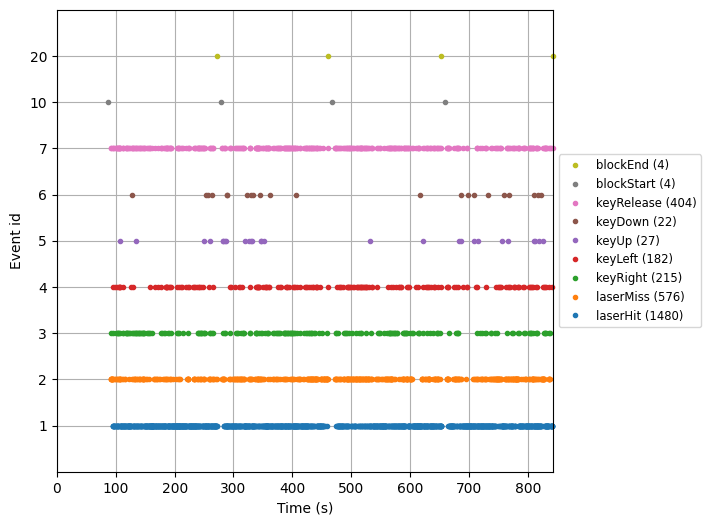

<Figure size 640x480 with 0 Axes>

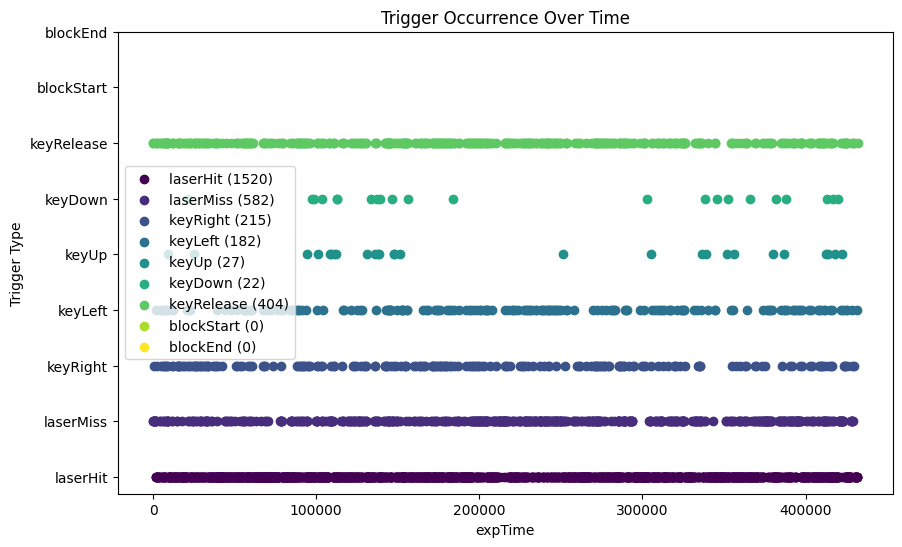

In [14]:

## Inspect events ####

####    trigger list:
# expStart      = 100;
# practiceMove  = 101;
# practiceSize  = 102;
# expEnd        = 105;
# lastFrame     = 99;
#
# blockStart    = 10;
# blockEnd      = 20;
#
# laserHit      = 1;
# laserMiss     = 2;
#
# keyRight      = 3;
# keyLeft       = 4;
# keyUp         = 5;
# keyDown       = 6;
# keyRelease    = 7;

events = mne.find_events(raw, min_duration=0.005)
event_color = {}
event_dict = {'laserHit': 1, 'laserMiss': 2, 'keyRight': 3, 'keyLeft': 4, 'keyUp': 5, 'keyDown': 6, 'keyRelease': 7, 'blockStart': 10, 'blockEnd': 20}

# Plot events
fig, ax = plt.subplots(1,1, figsize=(8,6))
fig = mne.viz.plot_events(events, sfreq=raw.info['sfreq'], event_id=event_dict, on_missing='ignore', verbose='error', axes=ax, show=True)

# Save the plot
fig_outpath = os.path.join(outdir_meg_plots, 'triggers-meg.png')
plt.savefig(fig_outpath)

# Compare the events to the ones inside psychopy-generated csv file

# add a time column; assume screen refresh rate of 100Hz
raw_beh['expTime'] = range(0, 43196 * 10, 10) # 100Hz = 1 new frame every 10ms

# Create a list of unique trigger values
unique_triggers = sorted(set(event_dict.values()))
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_triggers)))

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 6))
# Initialize a dictionary to store the count of each trigger
trigger_counts = {key: 0 for key in event_dict.keys()}

# Loop through unique triggers and plot each as a separate row
for idx, trigger_value in enumerate(unique_triggers):
    # Filter the DataFrame for rows with the current trigger value
    filtered_data = raw_beh[raw_beh[" 'triggerValue'"] == trigger_value]

    # Get the trigger label for the current trigger value
    trigger_label = list(event_dict.keys())[list(event_dict.values()).index(trigger_value)]

    # Count the occurrences of the current trigger
    trigger_count = len(filtered_data)

    # Update the trigger_counts dictionary
    trigger_counts[trigger_label] = trigger_count

    # Plot expTime vs. trigger_value for the current trigger, with label
    ax.scatter(filtered_data['expTime'], [idx] * len(filtered_data), label=f'{trigger_label} ({trigger_count})',
               color=colors[idx])

# Set y-axis labels based on trigger labels
ax.set_yticks(range(len(unique_triggers)))
ax.set_yticklabels(list(event_dict.keys()))

# Add labels and legend
ax.set_xlabel('expTime')
ax.set_ylabel('Trigger Type')
ax.set_title('Trigger Occurrence Over Time')
# Create a legend with custom labels
legend_labels = [f'{key} ({trigger_counts[key]})' for key in event_dict.keys()]
ax.legend(labels=legend_labels)

# Save the plot
fig_outpath = os.path.join(outdir_meg_plots, 'triggers-psychopy.png')
plt.savefig(fig_outpath)


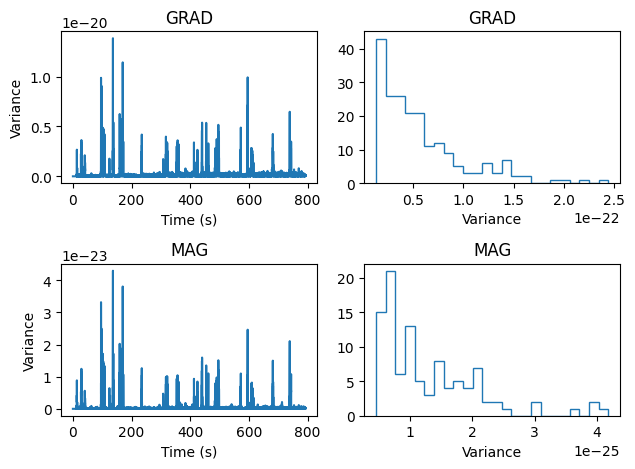

<Figure size 640x480 with 0 Axes>

In [15]:
# Check data quality: 1) variance of the data (over time, and over channels)...

## Let's create a function with which we can easily look at the variance of the data
def plot_var(raw):
    mag = raw.get_data(picks='mag', reject_by_annotation='NaN')
    grad = raw.get_data(picks='grad', reject_by_annotation='NaN')

    fig, ax = plt.subplots(2,2)
    plt.axes(ax[0,0])
    plt.plot(raw.times, np.nanvar(grad, axis=0)), plt.title('GRAD'),  plt.xlabel('Time (s)'), plt.ylabel('Variance')
    plt.axes(ax[1,0])
    plt.plot(raw.times, np.nanvar(mag, axis=0)), plt.title('MAG'), plt.xlabel('Time (s)'), plt.ylabel('Variance')

    plt.axes(ax[0,1])
    plt.hist(np.nanvar(grad, axis=1), bins=24, histtype='step'), plt.title('GRAD'), plt.xlabel('Variance')
    plt.axes(ax[1,1])
    plt.hist(np.nanvar(mag, axis=1), bins=24, histtype='step'), plt.title('MAG'), plt.xlabel('Variance')

    plt.tight_layout()
    plt.show()
    return fig, ax

## Now plot variance over time and over channels - seperately for each channel type
fig, ax = plot_var(raw)
plt.savefig(os.path.join(outdir_meg_plots, 'var_raw.png'), format='png')

Effective window size : 0.256 (s)


/Users/amyli/opt/anaconda3/envs/osl-ws/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


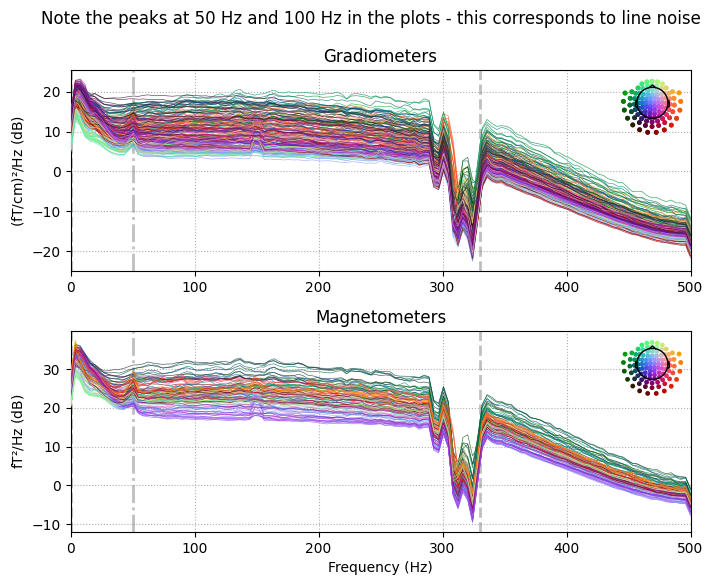

In [16]:
# ... and the frequency domain power spectral density (PSD, or power spectrum)
psd = raw.compute_psd(picks='meg')
fig, ax = plt.subplots(2,1, figsize = (8,6))
fig = psd.plot(axes=ax)
plt.suptitle('Note the peaks at 50 Hz and 100 Hz in the plots - this corresponds to line noise')

# Save the plot
plt.savefig(os.path.join(outdir_meg_plots, 'psd_raw.png'), format='png')

Effective window size : 0.256 (s)
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.25 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.25
- Lower transition bandwidth: 0.25 Hz (-6 dB cutoff frequency: 0.12 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 13201 samples (13.201 sec)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    6.6s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:   11.2s


Effective window size : 0.256 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    7.8s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:   15.3s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:   22.6s


Effective window size : 0.256 (s)


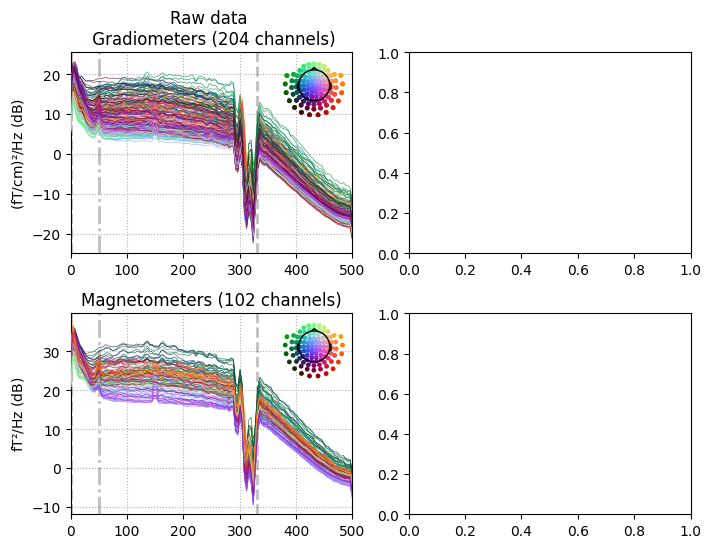

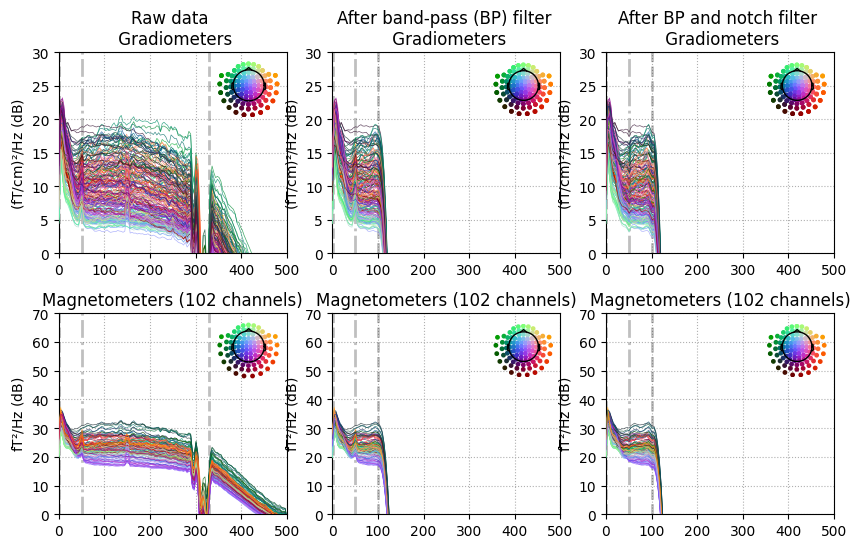

In [17]:
## Preprocess the data ####

### Bandpass between 0.25 and 100Hz ####
psd = raw.compute_psd(picks='meg')
fig, ax = plt.subplots(2,2, figsize = (8,6))
psd.plot(axes=ax[:,0])
ax[0,0].set_title('Raw data \n Gradiometers (204 channels)')

raw_bp = raw.copy().filter(l_freq=0.25, h_freq=100) # suggested to set l_freq to 1.0 for ICA
psd_bp = raw_bp.compute_psd(picks='meg')

### Notch filter at 50 and 100 Hz ####

# Now use a notch filter and plot again. (Note that we first copy the raw data so that we keep an original copy).
freqs = (50, 100) # where peaks are indicative of line noise
raw_notch = raw_bp.copy().notch_filter(freqs=freqs, picks='meg')
psd_notch = raw_notch.compute_psd(picks='meg')

# plot the previous two figures again
fig, ax = plt.subplots(2,3, figsize = (10,6))
psd.plot(axes=ax[:,0])
ax[0,0].set_title('Raw data \n Gradiometers')
psd_bp.plot(axes=ax[:,1])
ax[0,1].set_title('After band-pass (BP) filter \n Gradiometers')

# plot the BP + notch filtered PSD
psd_notch.plot(axes=ax[:,2]) # See the plot above
ax[0,2].set_title('After BP and notch filter \n Gradiometers')

# Make sure the y-axes are the same, to ease comparison
[ax[0,i].set_ylim((0,30)) for i in range(3)]
[ax[1,i].set_ylim((0,70)) for i in range(3)]

# Save the plot
plt.savefig(os.path.join(outdir_meg_plots, 'psd_bp-notch.png'), format='png')

Setting 49999 of 793000 (6.31%) samples to NaN, retaining 743001 (93.69%) samples.
Setting 49999 of 793000 (6.31%) samples to NaN, retaining 743001 (93.69%) samples.


/var/folders/hc/klyfrm9s00364wkvjdf8g3mr0000gn/T/ipykernel_13021/3967105945.py:10: RuntimeWarning: Degrees of freedom <= 0 for slice.
  plt.plot(raw.times, np.nanvar(grad, axis=0)), plt.title('GRAD'),  plt.xlabel('Time (s)'), plt.ylabel('Variance')
/var/folders/hc/klyfrm9s00364wkvjdf8g3mr0000gn/T/ipykernel_13021/3967105945.py:12: RuntimeWarning: Degrees of freedom <= 0 for slice.
  plt.plot(raw.times, np.nanvar(mag, axis=0)), plt.title('MAG'), plt.xlabel('Time (s)'), plt.ylabel('Variance')


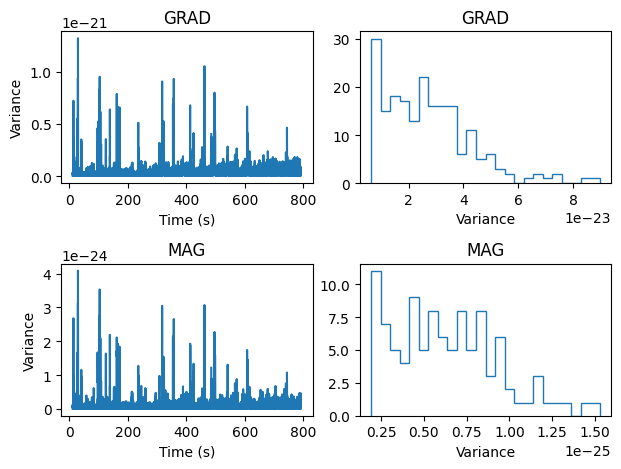

<Figure size 640x480 with 0 Axes>

In [18]:
### Bad segment/channel detection - do separately for each channel type

# Bad segment detection
raw_badseg = osl.preprocessing.osl_wrappers.detect_badsegments(raw_notch.copy(), picks='grad', segment_len=1000)
raw_badseg = osl.preprocessing.osl_wrappers.detect_badsegments(raw_badseg, picks='mag')
fig, ax = plot_var(raw_badseg)

# Save the plot
plt.savefig(os.path.join(outdir_meg_plots, 'var_bp-notch-badseg.png'), format='png')


These channels were marked as bad: []
Setting 49999 of 793000 (6.31%) samples to NaN, retaining 743001 (93.69%) samples.
Setting 49999 of 793000 (6.31%) samples to NaN, retaining 743001 (93.69%) samples.


/var/folders/hc/klyfrm9s00364wkvjdf8g3mr0000gn/T/ipykernel_13021/3967105945.py:10: RuntimeWarning: Degrees of freedom <= 0 for slice.
  plt.plot(raw.times, np.nanvar(grad, axis=0)), plt.title('GRAD'),  plt.xlabel('Time (s)'), plt.ylabel('Variance')
/var/folders/hc/klyfrm9s00364wkvjdf8g3mr0000gn/T/ipykernel_13021/3967105945.py:12: RuntimeWarning: Degrees of freedom <= 0 for slice.
  plt.plot(raw.times, np.nanvar(mag, axis=0)), plt.title('MAG'), plt.xlabel('Time (s)'), plt.ylabel('Variance')


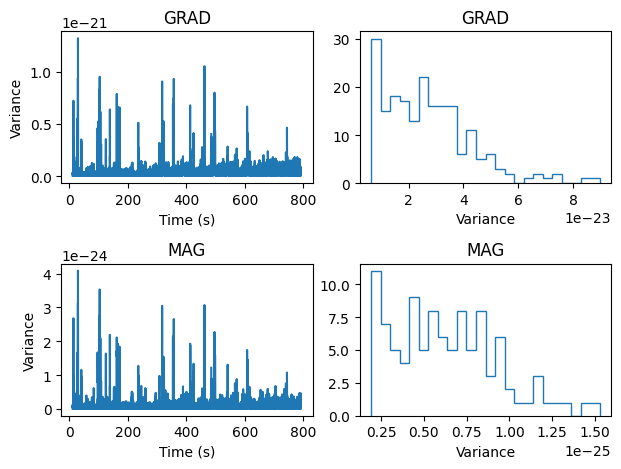

<Figure size 640x480 with 0 Axes>

In [19]:
# Bad channel detection
raw_badchan = osl.preprocessing.osl_wrappers.detect_badchannels(raw_badseg.copy(), picks='grad')
raw_badchan = osl.preprocessing.osl_wrappers.detect_badchannels(raw_badchan, picks='mag')
print(f"These channels were marked as bad: {raw.info['bads']}")

## Visualise again
fig, ax = plot_var(raw_badchan)
plt.savefig(os.path.join(outdir_meg_plots, 'var_bp-notch-badseg-badchan.png'), format='png')

Using matplotlib as 2D backend.


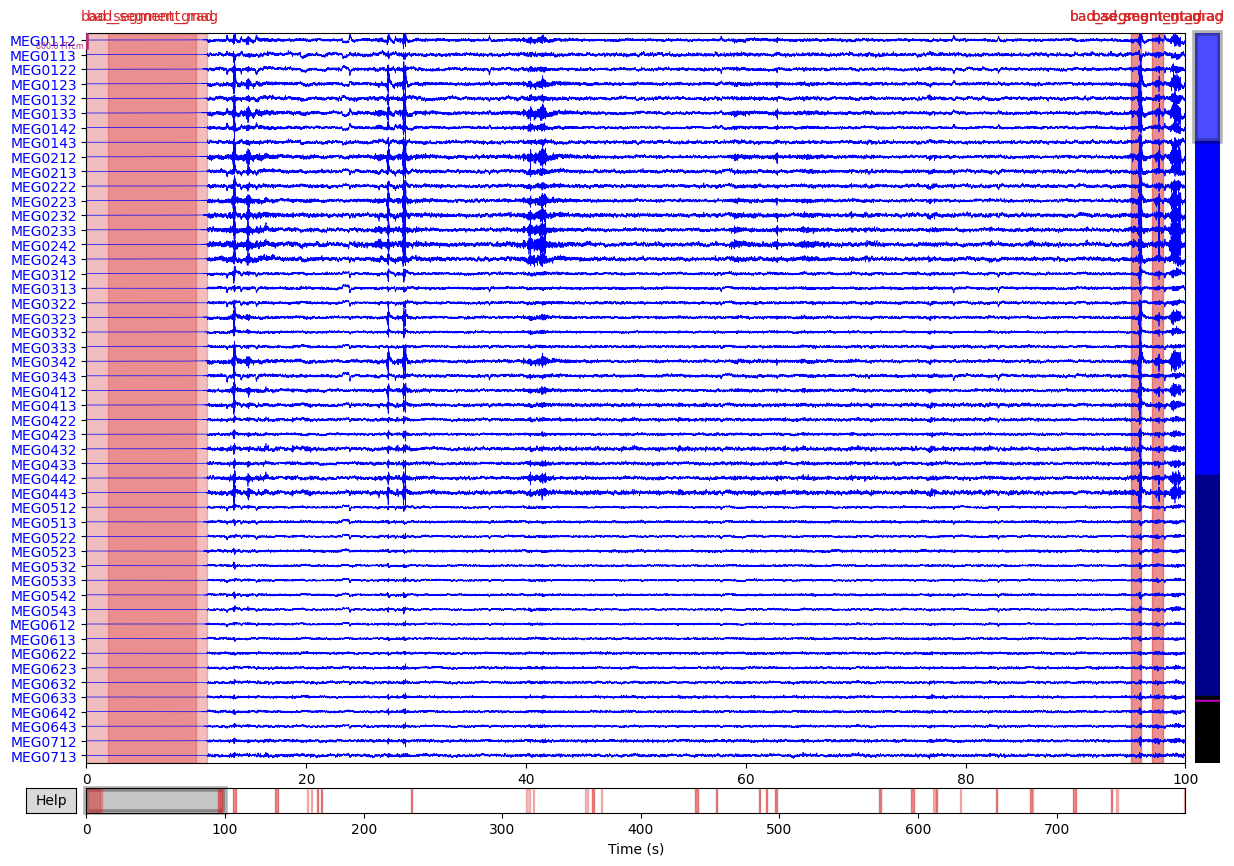

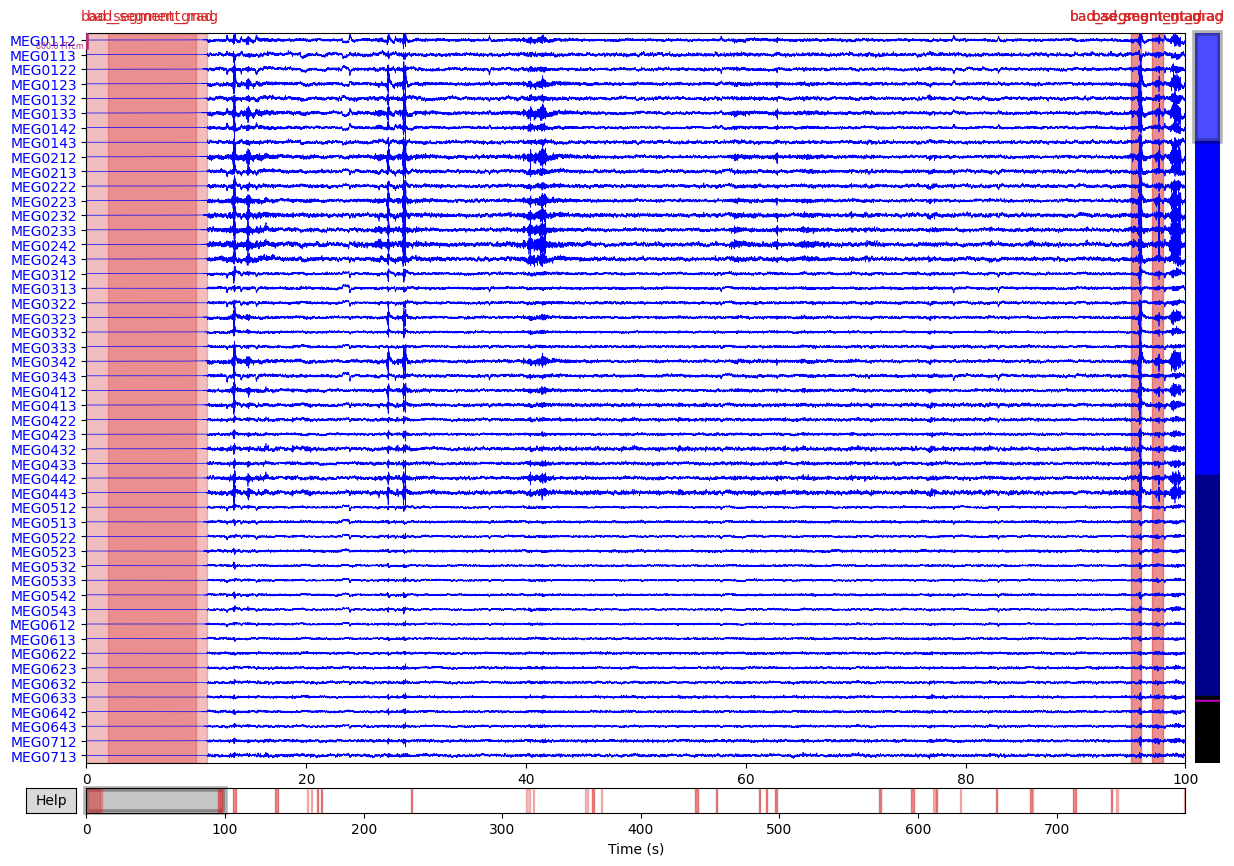

In [20]:
## See raw data - notice how bad segments are marked
raw_badchan.plot(duration=100, n_channels=50)

In [21]:
## Do the ICA
ica = mne.preprocessing.ICA(n_components=64, random_state=42) # check which grad/mag it's doing ica on
ica.fit(raw_badchan.copy().filter(l_freq=1, h_freq=None))

ica.save(os.path.join(outdir_meg_derivatives, 'ica_bp-notch-badseg-badchan.fif'), overwrite=True)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3301 samples (3.301 sec)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    8.1s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:   13.9s


Fitting ICA to data using 306 channels (please be patient, this may take a while)
Omitting 49999 of 793000 (6.31%) samples, retaining 743001 (93.69%) samples.
Selecting by number: 64 components
Fitting ICA took 167.7s.
Overwriting existing file.
Writing ICA solution to /Users/amyli/Desktop/LH-lab/coins-meg_meg-analysis/preprocessed/sub-12/run-2/meg/max/derivatives/ica_bp-notch-badseg-badchan.fif...


/var/folders/hc/klyfrm9s00364wkvjdf8g3mr0000gn/T/ipykernel_13021/2676680038.py:5: RuntimeWarning: This filename (/Users/amyli/Desktop/LH-lab/coins-meg_meg-analysis/preprocessed/sub-12/run-2/meg/max/derivatives/ica_bp-notch-badseg-badchan.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(os.path.join(outdir_meg_derivatives, 'ica_bp-notch-badseg-badchan.fif'), overwrite=True)


<ICA | raw data decomposition, method: fastica (fit in 73 iterations on 743001 samples), 64 ICA components (306 PCA components available), channel types: mag, grad, no sources marked for exclusion>

Using EOG channels: EOG001, EOG002
EOG channel index for this subject is: [0 1]
Omitting 49999 of 793000 (6.31%) samples, retaining 743001 (93.69%) samples.
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 100 significant peaks
Number of EOG events detected: 100
Not setting metadata
100 matching events found
No baseline correction applied
Using data from preloaded Raw for 100 events and 1001 original time points ..

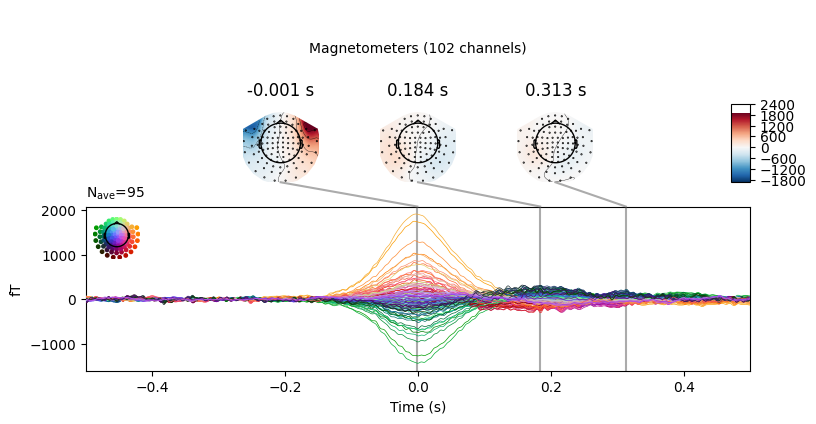

No projector specified for this dataset. Please consider the method self.add_proj.


<Figure size 640x480 with 0 Axes>

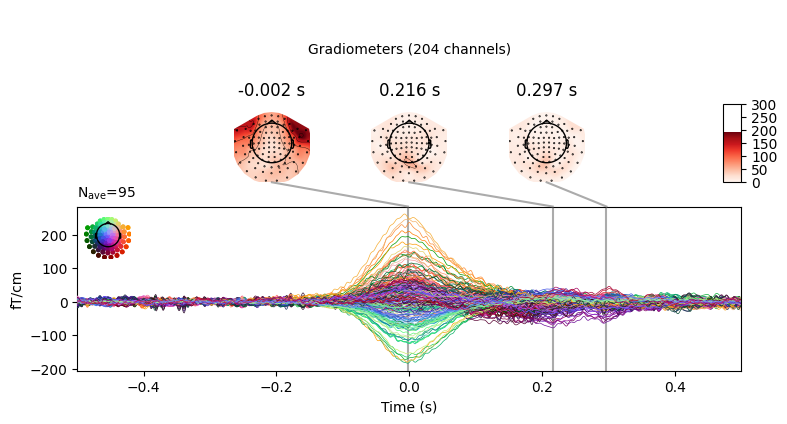

<Figure size 640x480 with 0 Axes>

In [23]:
## Visualise EOG and ECG artifacts

from mne.preprocessing import ICA, corrmap, create_ecg_epochs, create_eog_epochs

# We can get a summary of how the ocular artifact manifests across each channel type using create_eog_epochs
eog_evoked = create_eog_epochs(raw_badchan).average()
eog_evoked.apply_baseline(baseline=(None, -0.2))

eog_evoked.plot_joint(picks='mag')
plt.savefig(os.path.join(outdir_meg_plots, 'eog-mag_bp-notch-badseg-badchan.png'), format='png')

eog_evoked.plot_joint(picks='grad')
plt.savefig(os.path.join(outdir_meg_plots, 'eog_grad-bp-notch-badseg-badchan.png'), format='png')

Using channel ECG003 to identify heart beats.
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Number of ECG events detected : 910 (average pulse 73 / min.)
Not setting metadata
910 matching events found
No baseline correction applied
Using data from preloaded Raw for 910 events and 1001 original time points ...
32 bad epochs dropped
Applying baseline correction (mode: mean)
No projector specified for this dataset. Please consider the method self.add_proj.


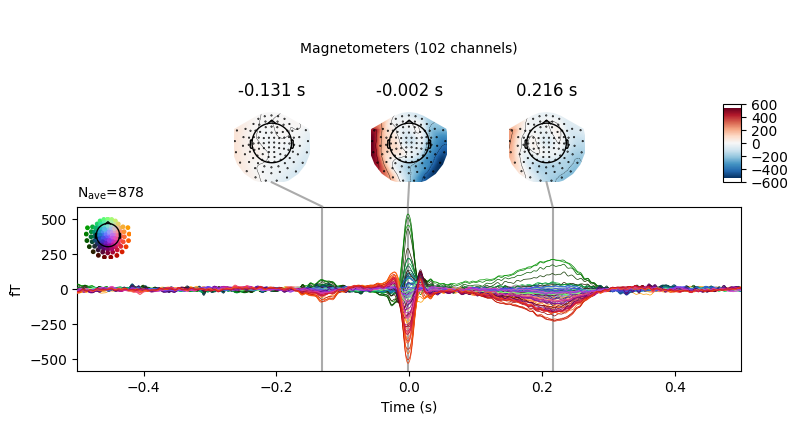

No projector specified for this dataset. Please consider the method self.add_proj.


<Figure size 640x480 with 0 Axes>

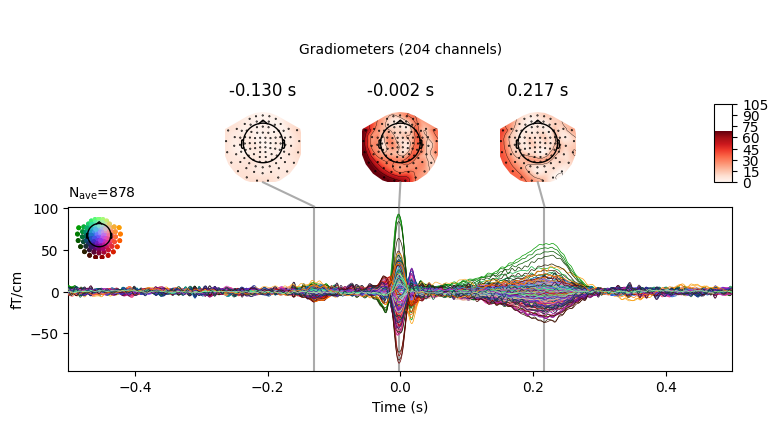

<Figure size 640x480 with 0 Axes>

In [25]:
# Now we’ll do the same for the heartbeat artifacts, using create_ecg_epochs:
ecg_evoked = create_ecg_epochs(raw_badchan).average()
ecg_evoked.apply_baseline(baseline=(None, -0.2))

ecg_evoked.plot_joint(picks='mag')
plt.savefig(os.path.join(outdir_meg_plots, 'ecg-mag_bp-notch-badseg-badchan.png'), format='png')

ecg_evoked.plot_joint(picks='grad')
plt.savefig(os.path.join(outdir_meg_plots, 'ecg-grad_bp-notch-badseg-badchan.png'), format='png')

In [26]:
## Use ECG and EOG data to correct artifacts in the data

# Find which ICs match the ECG pattern

# ECG003 corresponds to the ECG
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_badchan, ch_name='ECG003', method='correlation', threshold='auto')

Omitting 49999 of 793000 (6.31%) samples, retaining 743001 (93.69%) samples.
Omitting 49999 of 793000 (6.31%) samples, retaining 743001 (93.69%) samples.
... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 10000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 10000 samples (10.000 sec)



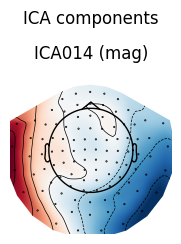

<Figure size 640x480 with 0 Axes>

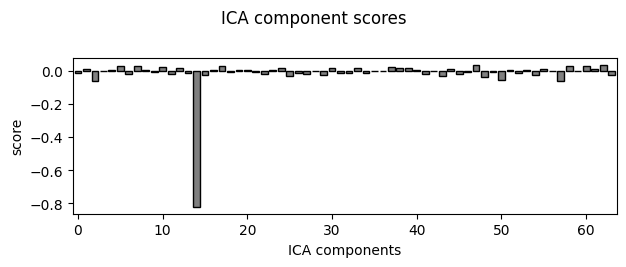

<Figure size 640x480 with 0 Axes>

In [28]:
# Plot ECG components

ica.plot_components(ecg_indices) # will return error if nothing in ecg_indices
plt.savefig(os.path.join(outdir_meg_plots, 'ecg-ics_bp-notch-badseg-badchan.png'), format='png')

# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)
# save this figure
plt.savefig(os.path.join(outdir_meg_plots, 'ecg-ics-scores_bp-notch-badseg-badchan.png'), format='png')

Using EOG channels: EOG001, EOG002
Omitting 49999 of 793000 (6.31%) samples, retaining 743001 (93.69%) samples.
Omitting 49999 of 793000 (6.31%) samples, retaining 743001 (93.69%) samples.
Omitting 49999 of 793000 (6.31%) samples, retaining 743001 (93.69%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Omitting 49999 of 793000 (6.31%) samples, retaining 743001 (93.69%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



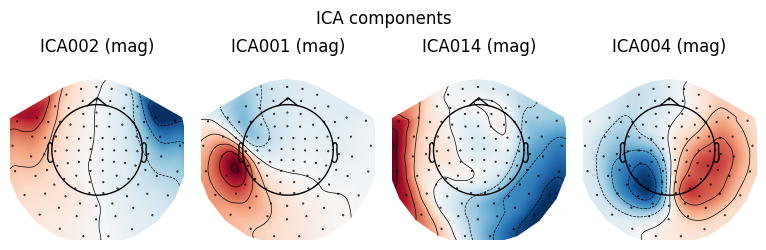

<Figure size 640x480 with 0 Axes>

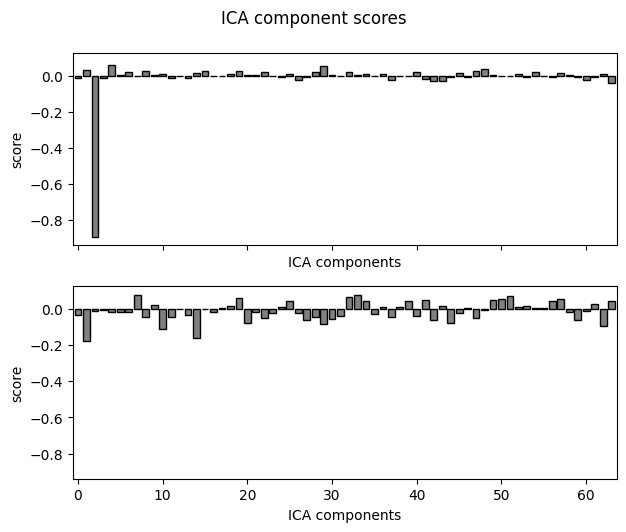

<Figure size 640x480 with 0 Axes>

In [29]:
# Find which ICs match the EOG pattern

# EOG001 corresponds to horizontal EOG (HEOG), EOG002 to vertical EOG (VEOG)
eog_indices, eog_scores = ica.find_bads_eog(raw_badchan, ch_name=['EOG001', 'EOG002'])
#   Detection is based on Pearson correlation between the filtered data and the filtered EOG channel.
#   Thresholding is based on adaptive z-scoring. The above threshold
#   components will be masked and the z-score will be recomputed
#   until no supra-threshold component remains.

ica.plot_components(eog_indices) # visualise the components
plt.savefig(os.path.join(outdir_meg_plots, 'eog-ics_bp-notch-badseg-badchan.png'), format='png')

# barplot of ICA component "EOG match" scores
ica.plot_scores(eog_scores)
# save this figure
plt.savefig(os.path.join(outdir_meg_plots, 'eog-ics-scores_bp-notch-badseg-badchan.png'), format='png')


In [31]:
ica.exclude = list(np.unique(eog_indices + ecg_indices)) # concatenate the two lists of components,
# and save unique components to ica.exclude which is then used by ica.apply to exclude the components

ica

<ICA | raw data decomposition, method: fastica (fit in 73 iterations on 743001 samples), 64 ICA components (306 PCA components available), channel types: mag, grad, 4 sources marked for exclusion>

In [32]:
# Remove bad components from the data by applying the exclusions
clean = ica.apply(raw_badchan.copy())

Applying ICA to Raw instance
    Transforming to ICA space (64 components)
    Zeroing out 4 ICA components
    Projecting back using 306 PCA components


In [33]:
# save the clean data
preproc_fname = os.path.join(outdir_meg_derivatives, fullpath.rsplit('/', 1)[-1].replace('.fif', '_preproc_raw.fif'))
print(preproc_fname) # verify filepath

/Users/amyli/Desktop/LH-lab/coins-meg_meg-analysis/preprocessed/sub-12/run-2/meg/max/derivatives/sub-12_ses-2-meg_task-coinsmeg_run-2_meg_transsss_preproc_raw.fif


In [34]:
clean.save(preproc_fname, overwrite=True) # save the cleaned data

Overwriting existing file.
Writing /Users/amyli/Desktop/LH-lab/coins-meg_meg-analysis/preprocessed/sub-12/run-2/meg/max/derivatives/sub-12_ses-2-meg_task-coinsmeg_run-2_meg_transsss_preproc_raw.fif
Closing /Users/amyli/Desktop/LH-lab/coins-meg_meg-analysis/preprocessed/sub-12/run-2/meg/max/derivatives/sub-12_ses-2-meg_task-coinsmeg_run-2_meg_transsss_preproc_raw.fif
[done]


## Laser Hit vs Miss Analysis

### Defining and Processing Epochs  

Opening raw data file /Users/amyli/Desktop/LH-lab/coins-meg_meg-analysis/preprocessed/sub-12/run-2/meg/max/derivatives/sub-12_ses-2-meg_task-coinsmeg_run-2_meg_transsss_preproc_raw.fif...
    Range : 61000 ... 853999 =     61.000 ...   853.999 secs
Ready.
Reading 0 ... 792999  =      0.000 ...   792.999 secs...
2916 events found
Event IDs: [  1   2   3   4   5   6   7  10  20 100 105]
Not setting metadata
2906 matching events found
Setting baseline interval to [-0.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
<Epochs |  2906 events (good & bad), -0.5 - 1 sec, baseline -0.5 – 0 sec, ~6.4 MB, data not loaded,
 'laserHit': 1480
 'laserMiss': 576
 'keyRight': 215
 'keyLeft': 182
 'keyUp': 27
 'keyDown': 22
 'keyRelease': 404>
Using data from preloaded Raw for 2906 events and 1501 original time points ...
    Rejecting  epoch based on EOG : ['EOG002']
    Rejecting  epoch based on EOG : ['EOG002']
    Rejecting  epoch based on EOG : ['EOG002']
    Reject

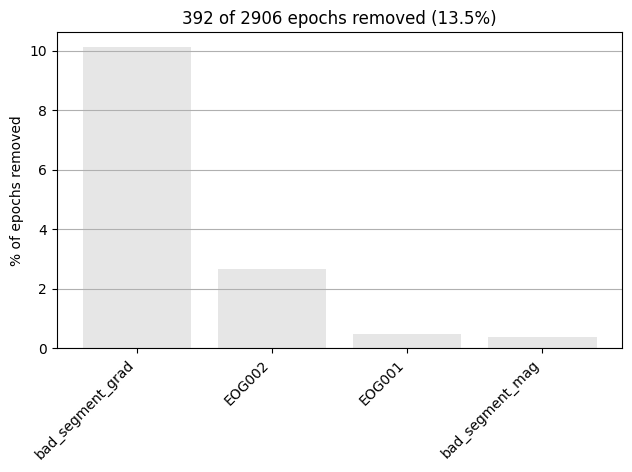

In [7]:
#preproc_fname = os.path.join(outdir_meg_derivatives, fullpath.rsplit('/', 1)[-1].replace('.fif', '_preproc_raw.fif'))
#clean = mne.io.read_raw_fif(preproc_fname, preload=True)

# Define the events 
events = mne.find_events(clean, min_duration=0.005)
event_color = {}
event_dict = {'laserHit': 1, 'laserMiss': 2, 'keyRight': 3, 'keyLeft': 4, 'keyUp': 5, 'keyDown': 6, 'keyRelease': 7}

# Create epochs (-0.5 to 1.0s epoch around event) 
epochs = mne.Epochs(clean, events, tmin=-0.5, tmax=1.0, event_id=event_dict) # -0.5-1.0
print(epochs)

# Remove epochs with particularly high peak-to-peak amplitudes, as this indicates there might still
# be segments in the data with high variance, that we didn't find earlier. We also include EOG peak-to-peak
# amplitude, as high amplitudes indicate saccades.
epochs.drop_bad({"eog": 6e-4, "mag": 4e-11, "grad": 4e-10}) # defines specific thresholds for peak-to-peak amplitudes in different types of channels

# Plot % of epochs dropped
epochs.plot_drop_log();

In [8]:
# Use equalize_event_counts() to randomly sample epochs from each condition to match the number
# of epochs present in the condition w/ the fewest good epochs
conditions = ["laserHit", "laserMiss"]
epochs.equalize_event_counts(conditions)

hit_epochs = epochs["laserHit"]
miss_epochs = epochs["laserMiss"]

Dropped 748 epochs: 48, 49, 79, 80, 81, 82, 83, 84, 87, 93, 97, 98, 99, 100, 101, 102, 103, 110, 112, 114, 117, 120, 122, 124, 125, 126, 127, 130, 132, 134, 135, 136, 137, 140, 141, 142, 143, 144, 145, 159, 160, 163, 166, 175, 177, 182, 184, 186, 192, 194, 209, 212, 213, 238, 239, 240, 241, 242, 243, 246, 249, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 266, 271, 274, 275, 276, 277, 280, 281, 282, 283, 286, 287, 290, 293, 294, 297, 298, 299, 300, 301, 302, 306, 308, 311, 312, 313, 316, 317, 328, 329, 330, 331, 332, 337, 338, 341, 342, 343, 352, 358, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 374, 375, 376, 377, 378, 379, 380, 383, 384, 385, 388, 389, 390, 395, 397, 399, 402, 403, 406, 407, 408, 409, 410, 413, 414, 415, 416, 419, 420, 421, 422, 423, 426, 427, 428, 429, 430, 431, 433, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 451, 452, 453, 460, 461, 462, 463, 465, 467, 468, 469, 470, 471, 474, 477, 478, 487, 490, 491, 494, 509

### Visualising Evoked Potential for Laser Hits

First visualise ERFs for all channels, for both magnetometers and gradiometers.

No projector specified for this dataset. Please consider the method self.add_proj.


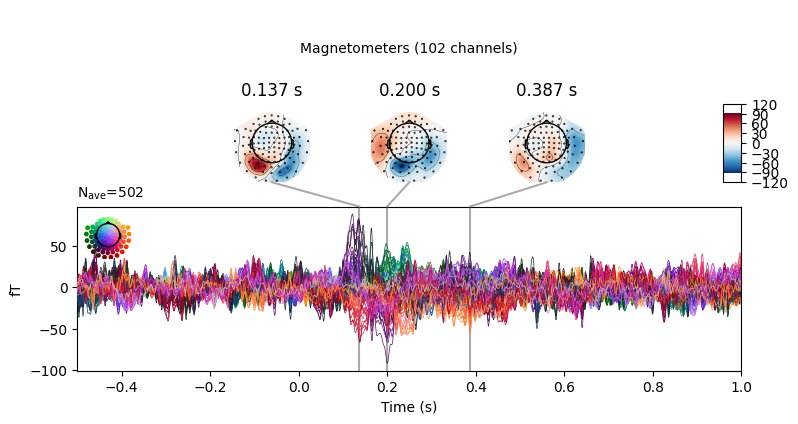

No projector specified for this dataset. Please consider the method self.add_proj.


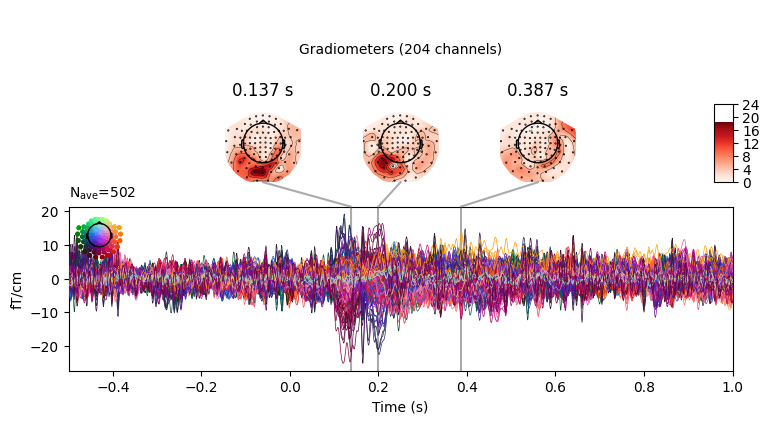

In [9]:
# Compute average evoked responses for hit and miss epochs

## hit ERFs
evoked_hit = hit_epochs.average()

evoked_hit.plot_joint(picks='mag')

evoked_hit.plot_joint(picks='grad');


### Visualising Evoked Potential for Laser Misses

First visualise ERFs for all channels, for both magnetometers and gradiometers.

No projector specified for this dataset. Please consider the method self.add_proj.


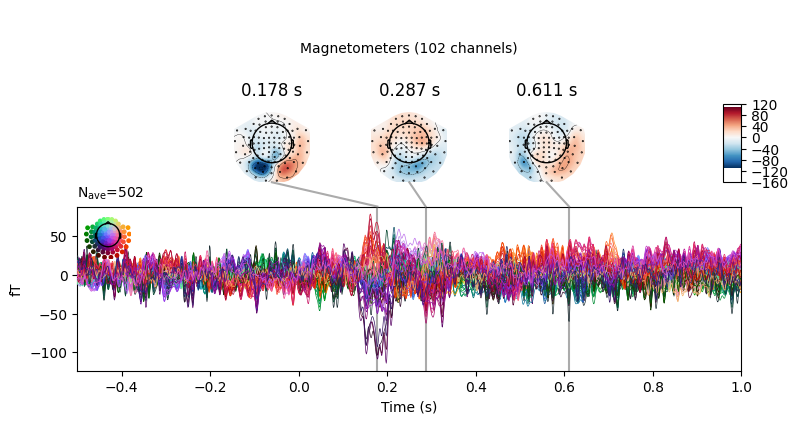

No projector specified for this dataset. Please consider the method self.add_proj.


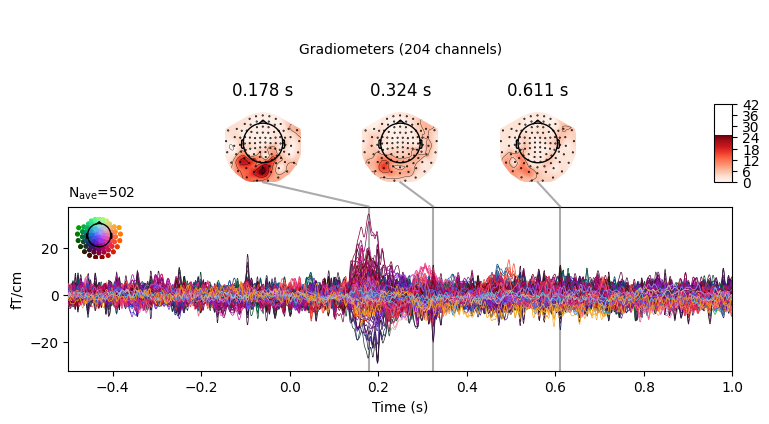

In [10]:
## miss ERFs
evoked_miss = miss_epochs.average()

evoked_miss.plot_joint(picks='mag')

evoked_miss.plot_joint(picks='grad');


### Comparing Laser Hits vs Misses

First compare global field power for hits vs. misses; for both magnetometers and gradiometers.

combining channels using "gfp"
combining channels using "gfp"


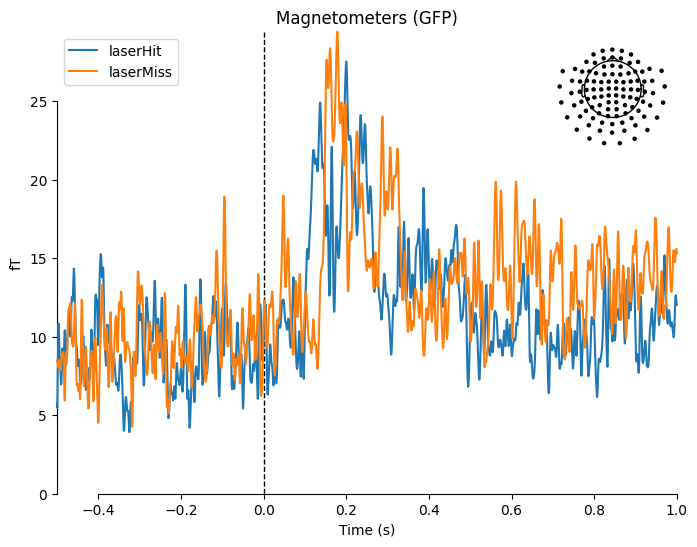

combining channels using "gfp"
combining channels using "gfp"


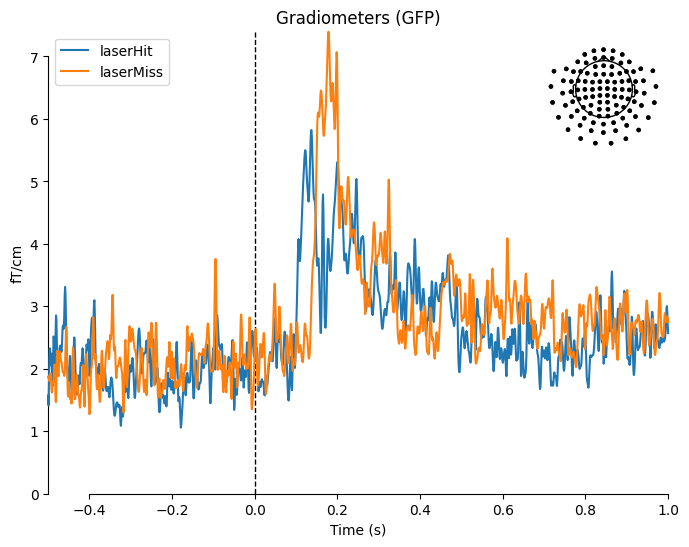

[<Figure size 800x600 with 2 Axes>]

In [11]:
## Compare hit vs miss evokeds, global field power

mne.viz.plot_compare_evokeds([evoked_hit, evoked_miss], picks='mag',
                             show_sensors='upper right')

mne.viz.plot_compare_evokeds([evoked_hit, evoked_miss], picks='grad',
                             show_sensors='upper right')

#### Plot difference waveform for laser hits vs misses

For all sensors...

No projector specified for this dataset. Please consider the method self.add_proj.


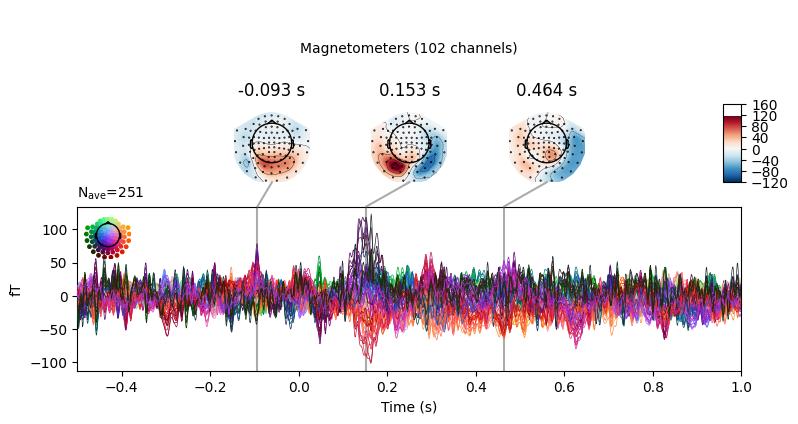

No projector specified for this dataset. Please consider the method self.add_proj.


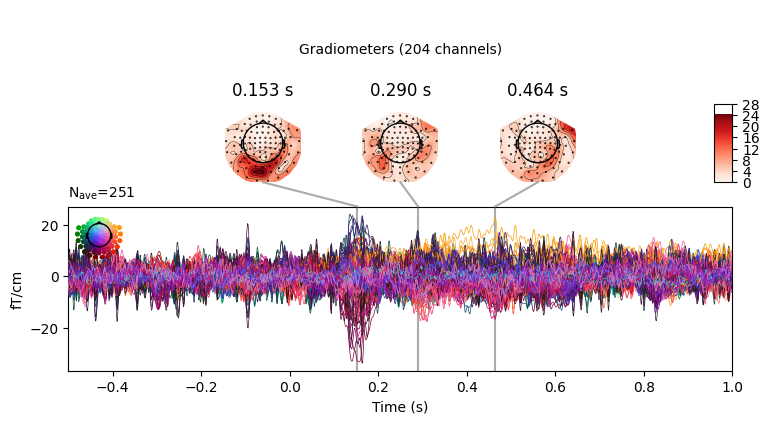

In [12]:
## difference waveform hit-miss

### all sensors and topography
evokeds_diff_hitVsMiss = mne.combine_evoked([evoked_hit, evoked_miss], weights=[1, -1])
evokeds_diff_hitVsMiss.plot_joint(picks='mag')
evokeds_diff_hitVsMiss.plot_joint(picks='grad');

## Movement Keys (Left vs. Right) Analysis

### Defining and Processing Epochs

Not setting metadata
2906 matching events found
No baseline correction applied
0 projection items activated
<Epochs |  2906 events (good & bad), -3 - 1 sec, baseline off, ~6.4 MB, data not loaded,
 'laserHit': 1480
 'laserMiss': 576
 'keyRight': 215
 'keyLeft': 182
 'keyUp': 27
 'keyDown': 22
 'keyRelease': 404>
Using data from preloaded Raw for 2906 events and 4001 original time points ...
    Rejecting  epoch based on EOG : ['EOG002']
    Rejecting  epoch based on EOG : ['EOG002']
    Rejecting  epoch based on EOG : ['EOG002']
    Rejecting  epoch based on EOG : ['EOG002']
    Rejecting  epoch based on EOG : ['EOG002']
    Rejecting  epoch based on EOG : ['EOG002']
    Rejecting  epoch based on EOG : ['EOG002']
    Rejecting  epoch based on EOG : ['EOG002']
    Rejecting  epoch based on EOG : ['EOG002']
    Rejecting  epoch based on EOG : ['EOG002']
    Rejecting  epoch based on EOG : ['EOG002']
    Rejecting  epoch based on EOG : ['EOG002']
    Rejecting  epoch based on EOG : ['EOG0

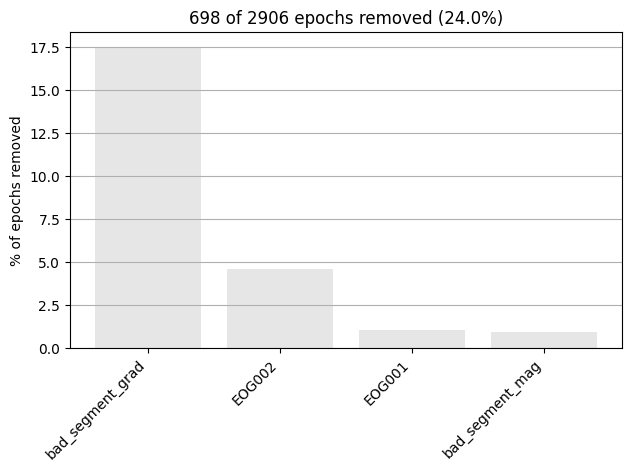

Dropped 40 epochs: 81, 101, 104, 108, 111, 114, 124, 131, 147, 166, 171, 173, 176, 183, 188, 194, 199, 203, 209, 213, 220, 224, 228, 243, 269, 279, 288, 437, 448, 468, 471, 477, 512, 521, 566, 574, 577, 605, 631, 676


In [24]:
# Create epochs for movement keys (left vs right); no baselining applied

epochs = mne.Epochs(clean, events, baseline=None, tmin=-3.0, tmax=1.0, event_id=event_dict) # different epoch times now compared to hit/miss
print(epochs)

# Remove epochs with particularly high peak-to-peak amplitudes, as we did for hit/miss epochs

epochs.drop_bad({"eog": 6e-4, "mag": 4e-11, "grad": 4e-10}) # defines specific thresholds for peak-to-peak amplitudes in different types of channels
epochs.plot_drop_log();

# use equalize_event_counts first to randomly sample epochs from each condition to match the number
# of epochs present in the condition w/ the fewest good epochs
conditions = ["keyLeft", "keyRight"]
epochs.equalize_event_counts(conditions)

left_epochs = epochs["keyLeft"]
right_epochs = epochs["keyRight"]

### Visualising Evoked Potentials for keyLeft

No projector specified for this dataset. Please consider the method self.add_proj.


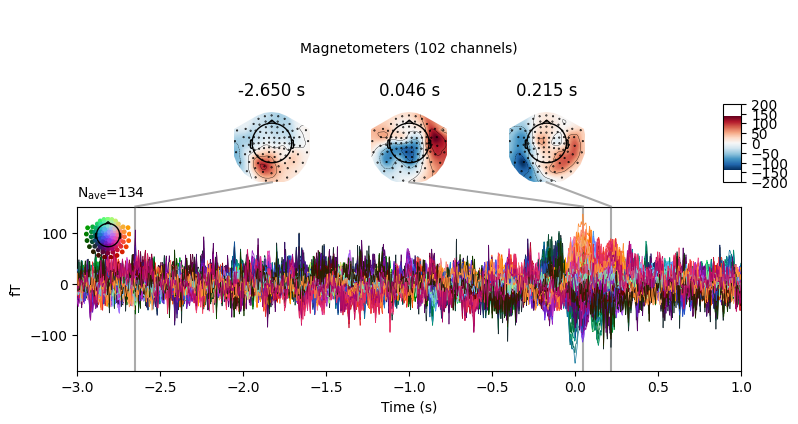

No projector specified for this dataset. Please consider the method self.add_proj.


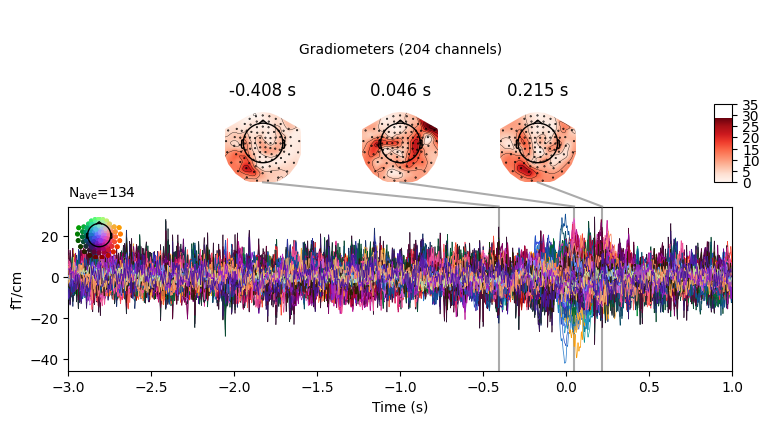

In [25]:
# Compute average evoked responses for left and right epochs

evoked_left = left_epochs.average()
evoked_left.plot_joint(picks='mag')

evoked_left.plot_joint(picks='grad');

### Visualising Evoked Potentials for keyRight

No projector specified for this dataset. Please consider the method self.add_proj.


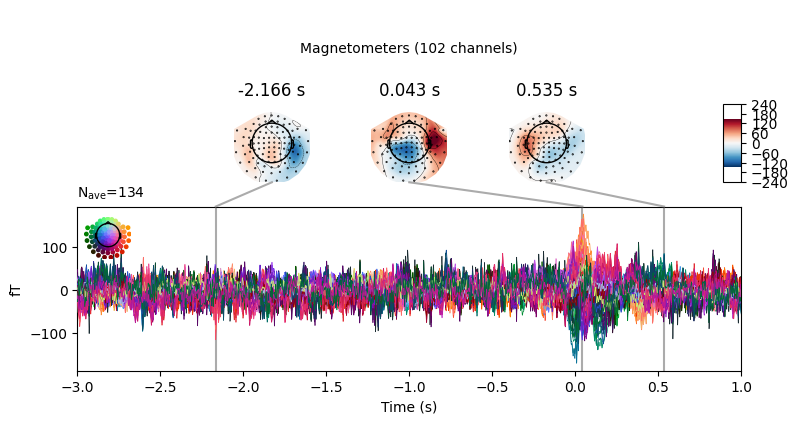

No projector specified for this dataset. Please consider the method self.add_proj.


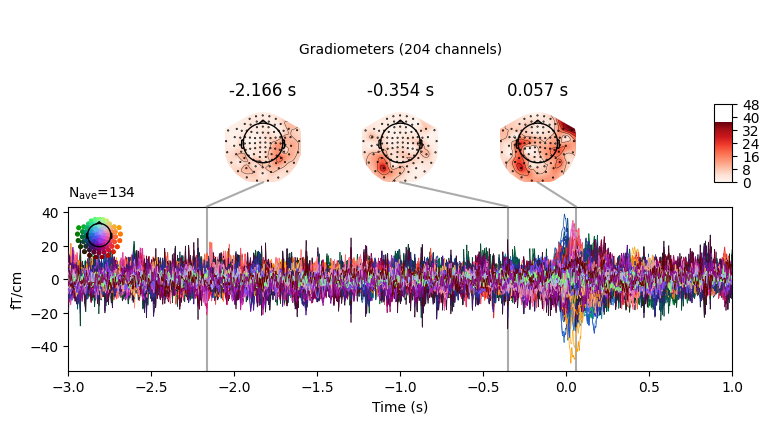

In [26]:
evoked_right = right_epochs.average()

evoked_right.plot_joint(picks='mag')

evoked_right.plot_joint(picks='grad');

### Comparing KeyLeft vs Right

First compare global field power for keyLeft vs. Right; for both magnetometers and gradiometers.

combining channels using "gfp"
combining channels using "gfp"


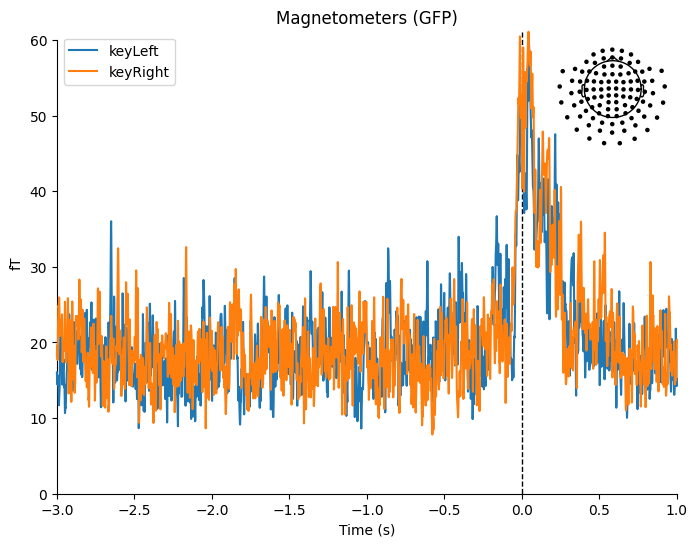

combining channels using "gfp"
combining channels using "gfp"


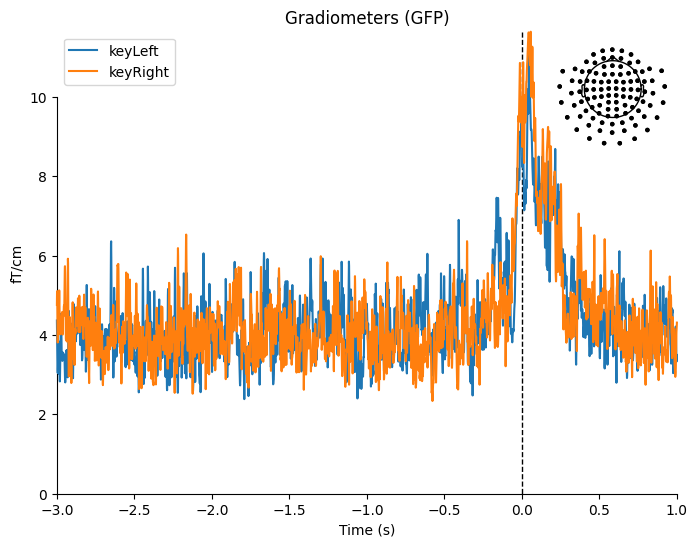

In [27]:
mne.viz.plot_compare_evokeds([evoked_left, evoked_right], picks='mag',
                             show_sensors='upper right')

mne.viz.plot_compare_evokeds([evoked_left, evoked_right], picks='grad',
                             show_sensors='upper right');

No projector specified for this dataset. Please consider the method self.add_proj.


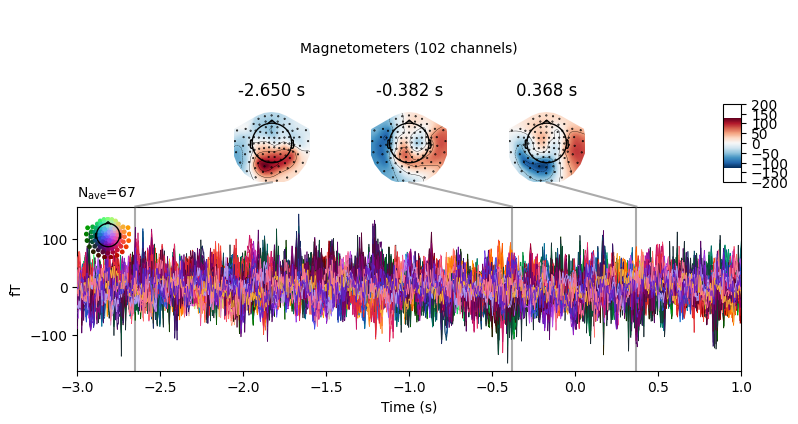

No projector specified for this dataset. Please consider the method self.add_proj.


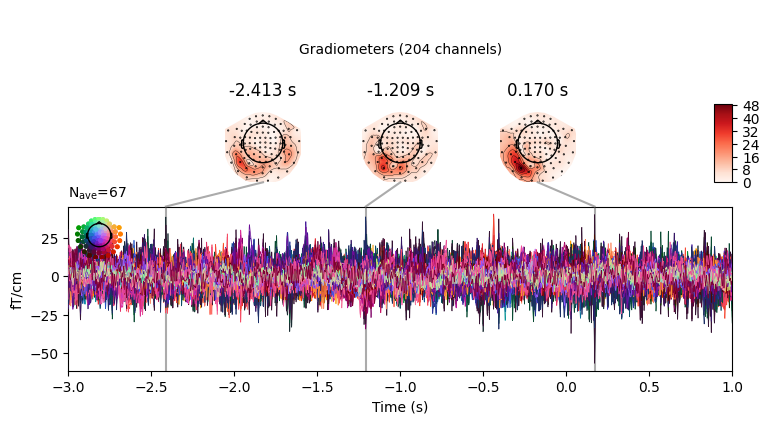

In [28]:
evokeds_diff_leftVsRight = mne.combine_evoked([evoked_left, evoked_right], weights=[1, -1])
evokeds_diff_leftVsRight.plot_joint(picks='mag')

evokeds_diff_leftVsRight.plot_joint(picks='grad');

## Shield Size Keys (Up vs. Down) Analysis

In [29]:
# Don't need to redefine epochs; used the previous non-baselined ones again from keyleft vs right

# use equalize_event_counts first to randomly sample epochs from each condition to match the number
# of epochs present in the condition w/ the fewest good epochs
conditions = ["keyUp", "keyDown"]
epochs.equalize_event_counts(conditions)

up_epochs = epochs["keyUp"]
down_epochs = epochs["keyDown"]

Dropped 4 epochs: 68, 530, 647, 1238


### Visualising Evoked Potentials for keyUp

No projector specified for this dataset. Please consider the method self.add_proj.


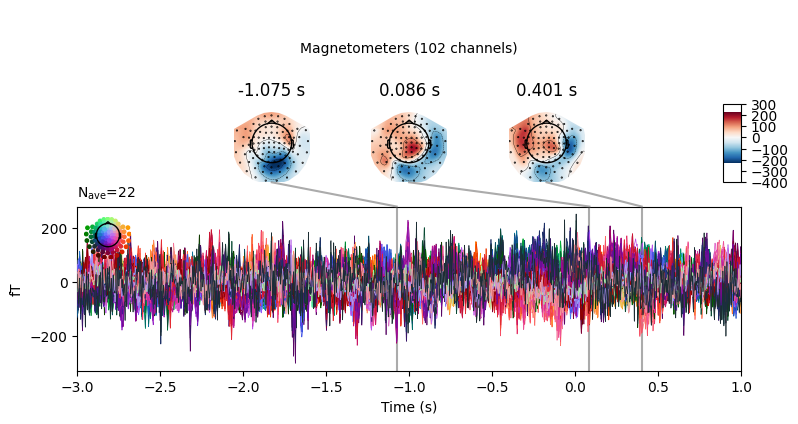

No projector specified for this dataset. Please consider the method self.add_proj.


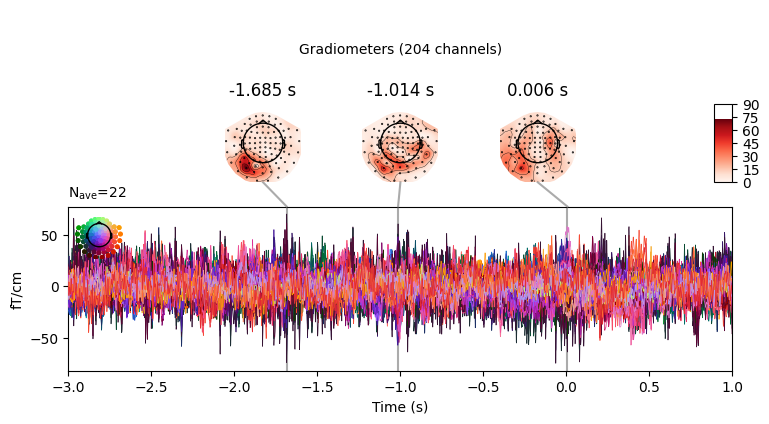

In [30]:
### Visualising Evoked Potentials for keyUp

# Compute average evoked responses for up and down epochs

evoked_up = up_epochs.average()

evoked_up.plot_joint(picks='mag')

evoked_up.plot_joint(picks='grad');

No projector specified for this dataset. Please consider the method self.add_proj.


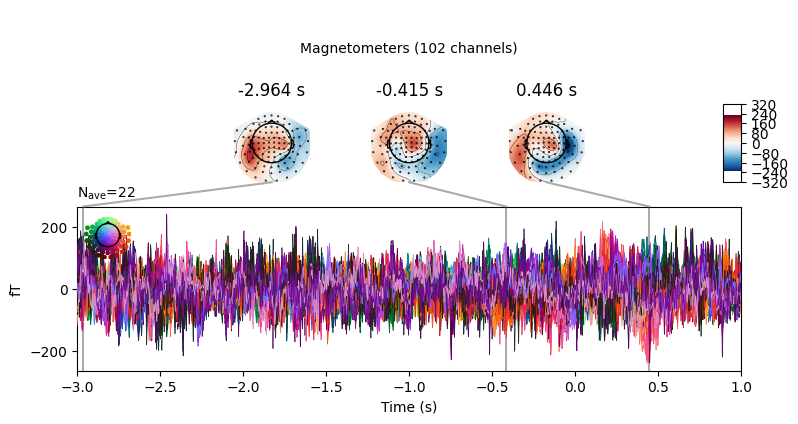

No projector specified for this dataset. Please consider the method self.add_proj.


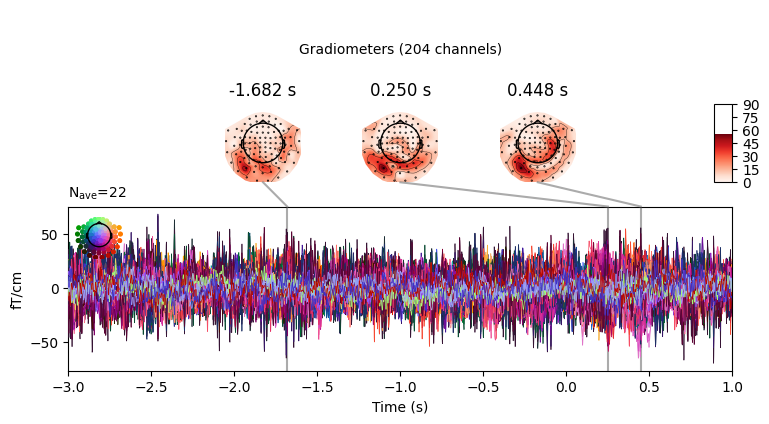

In [31]:

### Visualising Evoked Potentials for keyDown
evoked_down = down_epochs.average()

evoked_down.plot_joint(picks='mag')

evoked_down.plot_joint(picks='grad');


### Comparing KeyUp vs Down

First compare global field power for keyUp vs. Down; for both magnetometers and gradiometers.

combining channels using "gfp"
combining channels using "gfp"


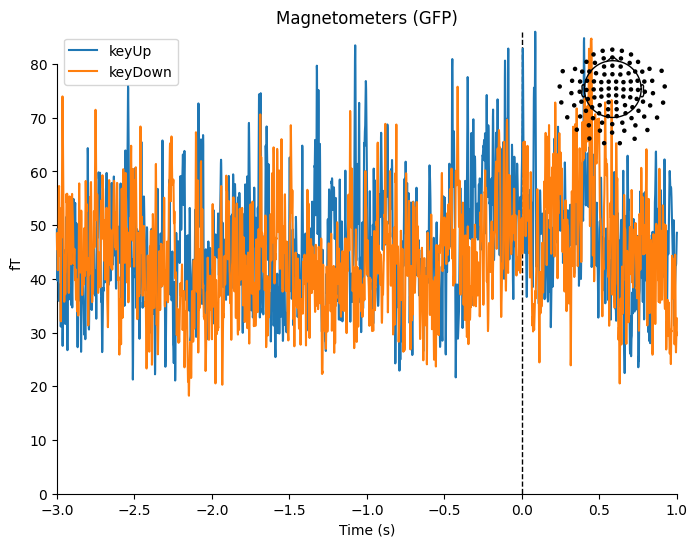

combining channels using "gfp"
combining channels using "gfp"


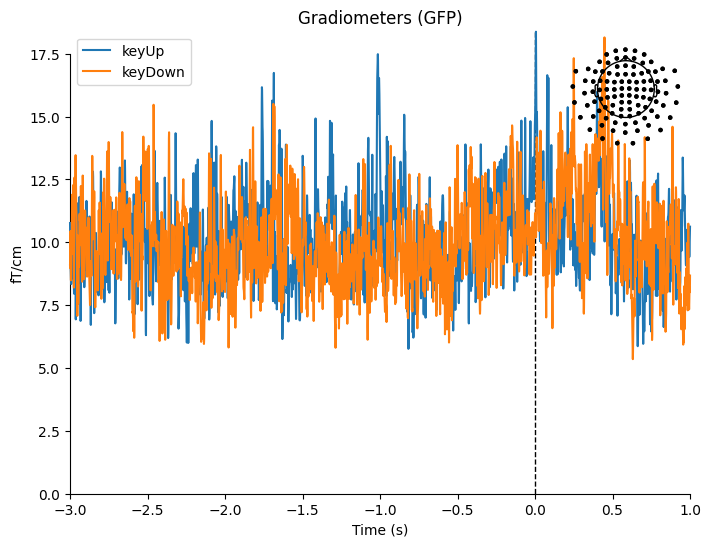

In [32]:
mne.viz.plot_compare_evokeds([evoked_up, evoked_down], picks='mag',
                             show_sensors='upper right')

mne.viz.plot_compare_evokeds([evoked_up, evoked_down], picks='grad',
                             show_sensors='upper right');

No projector specified for this dataset. Please consider the method self.add_proj.


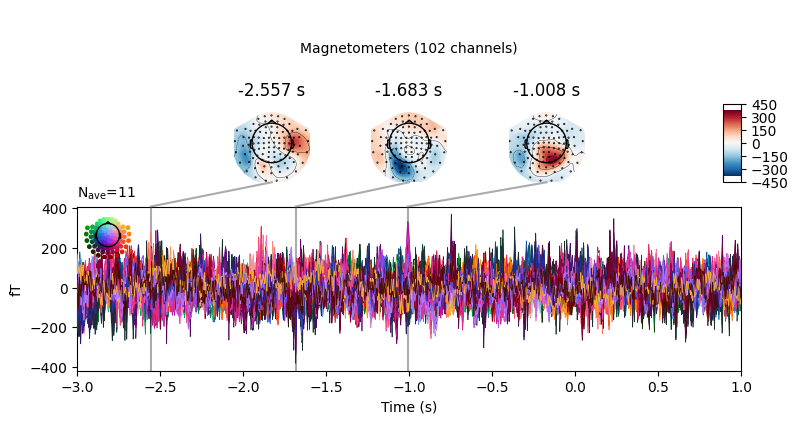

No projector specified for this dataset. Please consider the method self.add_proj.


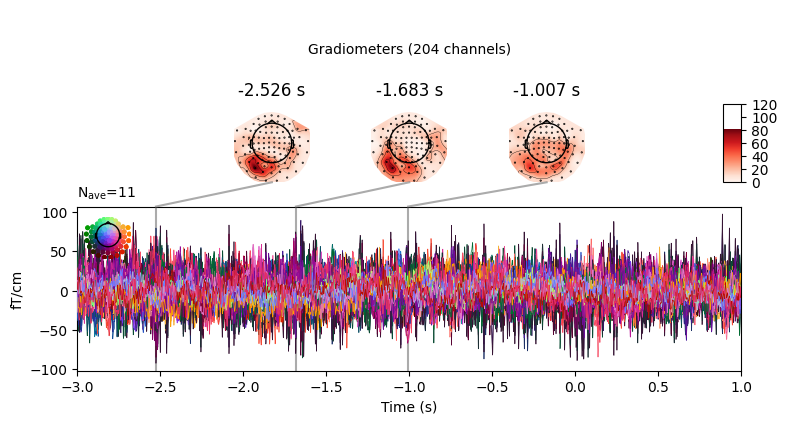

In [33]:
evokeds_diff_leftVsRight = mne.combine_evoked([evoked_up, evoked_down], weights=[1, -1])

evokeds_diff_leftVsRight.plot_joint(picks='mag')

evokeds_diff_leftVsRight.plot_joint(picks='grad');